In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [ ]:
test111

In [4]:
spark = SparkSession.builder.appName("CSVImportExample").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/02 09:21:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
df = spark.read.csv("BankChurners_1.csv", header=True, inferSchema=True)
df.show(truncate=False)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|Attrition_Flag   |Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [6]:
from pyspark.sql import SparkSession
import pandas as pd
df_desc = df.summary()
df_desc.show()

23/10/02 09:21:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------------------+---------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-----------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|summary|          CLIENTNUM|   Attrition_Flag|     Customer_Age|Gender|   Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|    Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|     Credit_Limit|Total_Revolving_Bal|  Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|  Total_Trans_Amt|   To

In [14]:
# 将summary结果转换为Pandas DataFrame
summary_df = df.summary().toPandas()

# 重新命名列，以确保数值与列名对应正确
summary_df = summary_df.transpose()
new_header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = new_header

# 打印调整后的结果
summary_df

summary,count,mean,stddev,min,25%,50%,75%,max
CLIENTNUM,10127,7.391776063336625E8,3.690378345023116E7,708082083,713032233,717924933,773140683,828343083
Attrition_Flag,10127,None,None,Attrited Customer,None,None,None,Existing Customer
Customer_Age,10127,46.32596030413745,8.016814032549046,26,41,46,52,73
Gender,10127,None,None,F,None,None,None,Male
Dependent_count,10127,2.3462032191172115,1.29890834890379,0,1,2,3,5
Education_Level,10127,None,None,College,None,None,None,Unknown
Marital_Status,10127,None,None,Divorced,None,None,None,Unknown
Income_Category,10127,None,None,$120K +,None,None,None,Unknown
Card_Category,10127,None,None,Blue,None,None,None,Silver
Months_on_book,10127,35.928409203120374,7.98641633087208,13,31,36,40,56


In [7]:
from pyspark.sql.functions import col, count, when, sum
from pyspark.sql.types import StringType

# 获取列名和数据类型
column_info = [(col_name, col_dataType)
               for col_name, col_dataType in df.dtypes]

# 获取非空值数量
non_null_counts = [count(when(col(col_name).isNotNull(), 1)).alias(col_name)
                   for col_name, _ in column_info]

# 获取数据类型统计
data_type_counts = df.agg(*[sum(when(col(col_name).cast(StringType()) == col_name, 1).otherwise(0)).alias(col_name)
                            for col_name, _ in column_info])

# 计算总行数
total_rows = df.count()

# 创建信息DataFrame
info_data = [("count", total_rows)] + non_null_counts
info_data.append(("data_type", None))
info_data += [(col_name, data_type_count)
              for (col_name, _), data_type_count in zip(column_info, data_type_counts.collect()[0])]

info_df = spark.createDataFrame(info_data, ["Attribute", "Value"])

# 显示结果
info_df.show()

TypeError: Unable to infer the type of the field _jc.

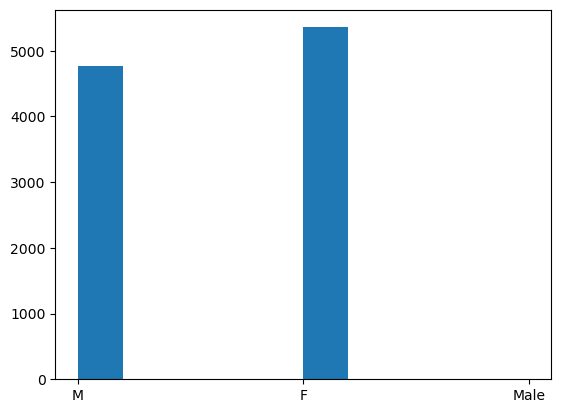

In [13]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert sex to an array using Numpy and plot it using pyplot. 
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

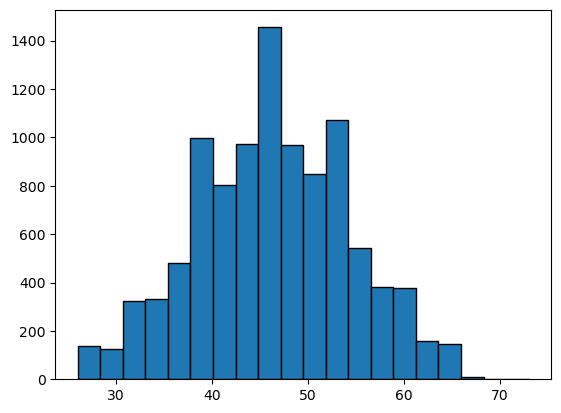

In [17]:
# 提取Customer_Age列数据并转换为NumPy数组
customer_age_arr = np.array(df.select('Customer_Age').collect())

# 使用Matplotlib绘制直方图
plt.hist(customer_age_arr, bins=20, edgecolor='k')
plt.show()

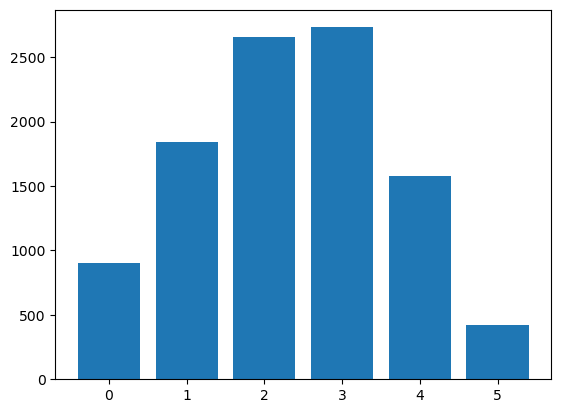

In [18]:
# 提取Dependent_count列数据并转换为NumPy数组
dependent_count_arr = np.array(df.select('Dependent_count').collect())

# 计算各个值的计数
unique_values, value_counts = np.unique(dependent_count_arr, return_counts=True)

# 使用Matplotlib绘制柱状图
plt.bar(unique_values, value_counts)
plt.show()

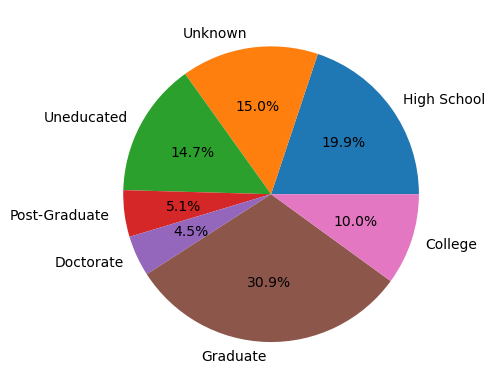

In [19]:
from collections import Counter

# 使用Spark DataFrame计算不同教育级别的计数
education_counts = df.groupBy('Education_Level').count().toPandas()

# 使用Counter创建教育级别计数的字典
education_counts_dict = dict(zip(education_counts['Education_Level'], education_counts['count']))

# 使用Matplotlib绘制饼图
plt.pie(education_counts_dict.values(), labels=education_counts_dict.keys(), autopct='%1.1f%%')
plt.show()

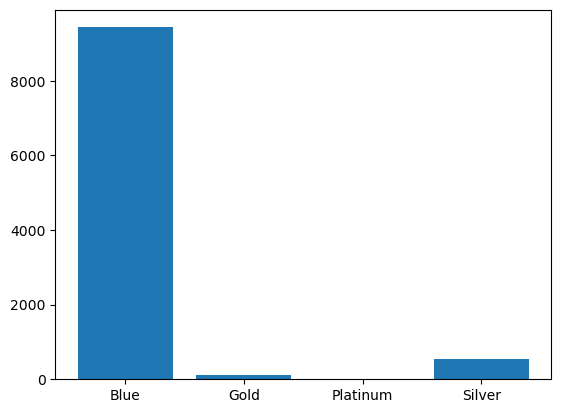

In [20]:
dependent_count_arr = np.array(df.select('Card_Category').collect())

unique_values, value_counts = np.unique(dependent_count_arr, return_counts=True)

plt.bar(unique_values, value_counts)
plt.show()

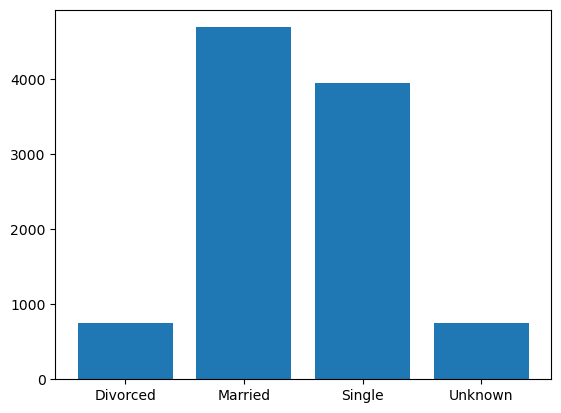

In [21]:
dependent_count_arr = np.array(df.select('Marital_Status').collect())

unique_values, value_counts = np.unique(dependent_count_arr, return_counts=True)

plt.bar(unique_values, value_counts)
plt.show()

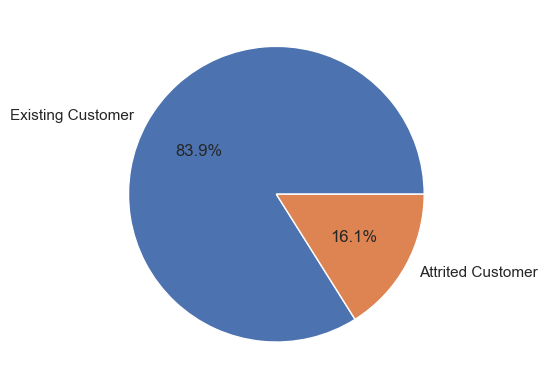

In [26]:
education_counts = df.groupBy('Attrition_Flag').count().toPandas()

# 使用Counter创建教育级别计数的字典
education_counts_dict = dict(zip(education_counts['Attrition_Flag'], education_counts['count']))

# 使用Matplotlib绘制饼图
plt.pie(education_counts_dict.values(), labels=education_counts_dict.keys(), autopct='%1.1f%%')
plt.show()

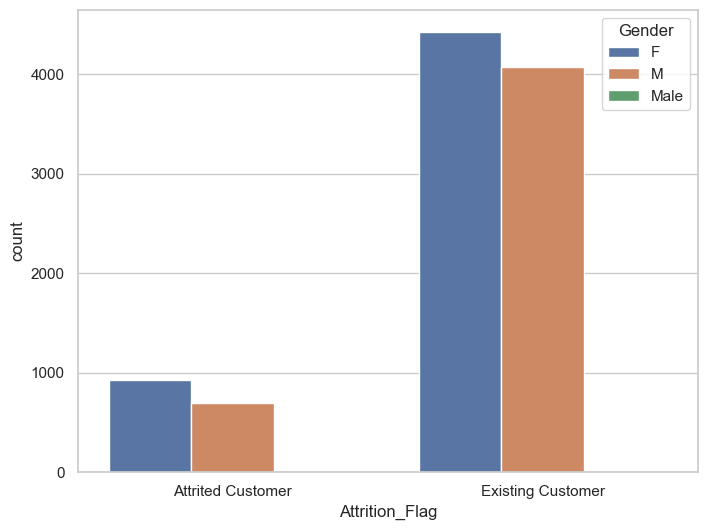

In [29]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

count_data = df.groupBy('Attrition_Flag', 'Gender').agg(F.count('*').alias('count')).orderBy('Attrition_Flag', 'Gender')

count_data = count_data.toPandas()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Attrition_Flag', y='count', hue='Gender', data=count_data)
plt.show()

In [ ]:
#2.4 Verify the data quality

In [30]:
columns_to_drop = ["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
df = df.drop(*columns_to_drop)

# 显示前几行数据
df.show()

# 显示数据信息
df.printSchema()

+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+--------